In [1]:
#Library Imports ------------------------------
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

In [2]:
#Data -----------------------------------------

#Single Slit
slit_width = 0.04                     #single slit width b [mm]
length = [250,400,450,500]            #length between slit and screen L [mm]
peak_width = [7.81,12.92,14.8,16.05]  #width of intensity peak W [mm]
wavelength = []                       #wavelength of laser lambda [nm]

#Loop to determine wavelength of laser;  lambda = W*b / 2*L
for index in range(len(length)):
    wave = (peak_width[index]*slit_width*10**6)/(2*length[index])
    wavelength.append(wave)


#Circular Aperture
ap_diameter = 0.4                      #diameter of circular aperture d [mm]
length2 = [850,900,950,1000]           #length between circular aperture and screen L [mm]
airy_diameter = [4.79,5.21,5.22,4.67]  #diameter of Airy disk D [mm]
wavelength2 = []                       #wavelength of laser lambda [nm]

#Loop to determine wavelength of laser;  lambda = D*d / 2.44*L
for index in range(len(length2)):
    wave2 = (airy_diameter[index]*ap_diameter*10**6)/(2.44*length2[index])
    wavelength2.append(wave2)

    
#Double Slit
slit_sep = 0.25                              #separation between two slits a [mm]
length3 = 550                                #length between slits and screen L [mm]
delta_y = [16.48,16.18,17.76,17.5,16.76,17]  #separation between bright spots y_m [mm]
wavelength3 = []                             #wavelength of laser lambda [nm]

#Loop to determine wavelength of laser;  lambda = a*y_m / 12*L
for y in delta_y:
    wave3 = (slit_sep*y*10**6)/(12*length3)
    wavelength3.append(wave3)


In [3]:
#Single Slit Error Analysis ---------------------

yerr = [0.399,0.224,0.309,0.334]  #uncertainty in peak_width [mm]
xerr = [0.5, 0.5, 0.5, 0.5]       #uncertainty in length [mm]

#Function appropriate for fitting data
def peak_width_curvefit(params, L):
    return (2*L*params[0]*10**-6)/(0.04)

#Container with width of intensity peak and length from screen with respective errors
data = RealData(length, peak_width, xerr, yerr)

#Container for model function
model = Model(peak_width_curvefit)

#Compute odr curvefit
pguess = [640]
odr = ODR(data, model, pguess)
output = odr.run()
print('The best fit wavelength is', str(round(output.beta[0],2))+'nm.')
print('The standard deviation of the wavelength is', str(round(output.sd_beta[0],2))+'nm.')

#Loop to determine residual data
residuals = []
for index in range(len(peak_width)):
    residuals.append(peak_width_curvefit(output.beta, length[index])-peak_width[index])

The best fit wavelength is 646.97nm.
The standard deviation of the wavelength is 4.58nm.


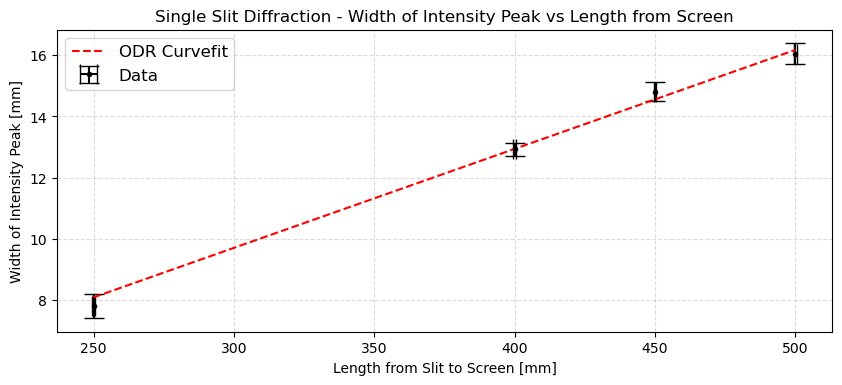

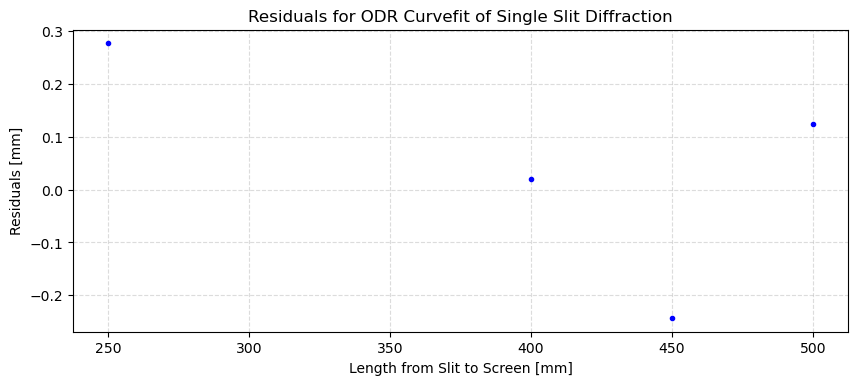

In [4]:
#Plotting Single Slit Data and Residuals ---------

#Range of lengths from slit to screen [mm]
length_theory = np.linspace(250,500,100)

#Width of intensity peak vs length from slit to screen
plt.figure(figsize=(10,4), dpi=100)
plt.errorbar(length, peak_width, yerr, xerr, capsize=7, fmt='k.', label='Data')
plt.plot(length_theory, peak_width_curvefit(output.beta, length_theory), linestyle='dashed', color='red', label='ODR Curvefit')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Length from Slit to Screen [mm]')
plt.ylabel('Width of Intensity Peak [mm]')
plt.title('Single Slit Diffraction - Width of Intensity Peak vs Length from Screen')
plt.legend(prop={'size':12})
plt.rcParams['legend.loc'] = 'center left'
plt.show()

#Residuals
plt.figure(figsize=(10,4), dpi=100)
plt.plot(length, residuals, marker='.', linestyle='None', color='blue', label='Residuals')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Length from Slit to Screen [mm]')
plt.ylabel('Residuals [mm]')
plt.title('Residuals for ODR Curvefit of Single Slit Diffraction')
plt.show()

In [5]:
#Circular Aperture Error Analysis ----------------

yerr2 = [0.399,0.224,0.309,0.334]  #uncertainty in airy_diameter [mm]
xerr2 = [0.5,0.5,0.5,0.5]          #uncertainty in length [mm]

#Function appropriate for fitting data
def airy_diameter_curvefit(params, L):
    return (2.44*L*params[0]*10**-6)/(0.4)

#Container with diameter of Airy disk and length from screen with respective errors
data2 = RealData(length2, airy_diameter, xerr2, yerr2)

#Container for model function
model2 = Model(airy_diameter_curvefit)

#Compute odr curvefit
pguess2 = [650]
odr2 = ODR(data2, model2, pguess2)
output2 = odr2.run()
print('The best fit wavelength is', str(round(output2.beta[0],2))+'nm.')
print('The standard deviation of the wavelength is', str(round(output2.sd_beta[0],2))+'nm.')

#Loop to determine residual data
residuals2 = []
for index in range(len(airy_diameter)):
    residuals2.append(airy_diameter_curvefit(output2.beta, length2[index])-airy_diameter[index])

The best fit wavelength is 892.36nm.
The standard deviation of the wavelength is 41.4nm.


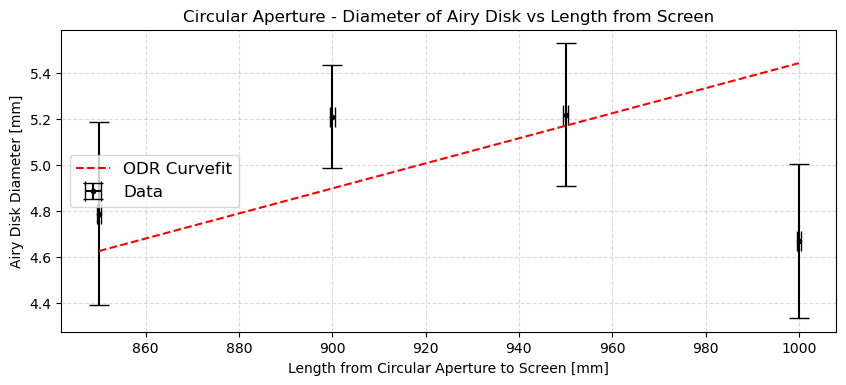

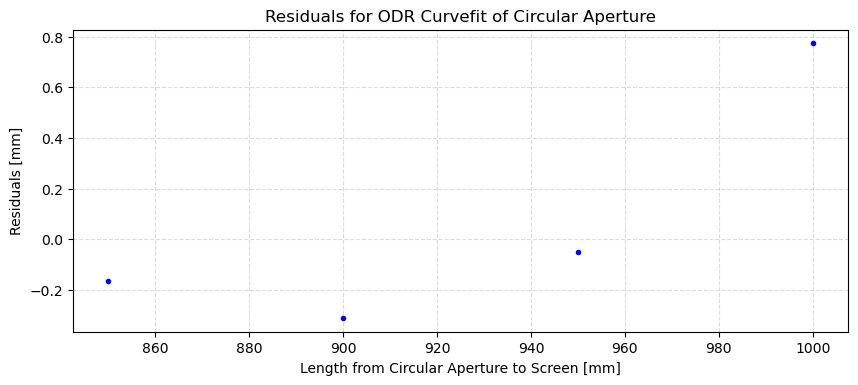

In [6]:
#Plotting Circular Aperture Data and Residuals ---

#Range of lengths from slit to screen [mm]
length2_theory = np.linspace(850,1000,100)

#Diameter of Airy disk vs length from slit to screen
plt.figure(figsize=(10,4), dpi=100)
plt.errorbar(length2, airy_diameter, yerr2, xerr2, capsize=7, fmt='k.', label='Data')
plt.plot(length2_theory, airy_diameter_curvefit(output2.beta, length2_theory), linestyle='dashed', color='red', label='ODR Curvefit')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Length from Circular Aperture to Screen [mm]')
plt.ylabel('Airy Disk Diameter [mm]')
plt.title('Circular Aperture - Diameter of Airy Disk vs Length from Screen')
plt.legend(prop={'size':12})
plt.rcParams['legend.loc'] = 'lower center'
plt.show()

#Residuals
plt.figure(figsize=(10,4), dpi=100)
plt.plot(length2, residuals2, marker='.', linestyle='None', color='blue', label='Residuals')
plt.grid(True, alpha=0.4, linestyle='dashed', color='darkgray')
plt.xlabel('Length from Circular Aperture to Screen [mm]')
plt.ylabel('Residuals [mm]')
plt.title('Residuals for ODR Curvefit of Circular Aperture')
plt.show()